<a href="https://colab.research.google.com/github/Jung0Jin/Pytorch_study/blob/master/6.%ED%95%A9%EC%84%B1%EA%B3%B1%EC%8B%A0%EA%B2%BD%EB%A7%9D%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#6.합성곱신경망활용

##6.1 데이터 다운로드

아래 링크에서 캐글 [Cat and Dog] 데이터를 다운로드 받으면 된다. train데이터만 이용하겠다.

https://www.kaggle.com/tongpython/cat-and-dog

* 데이터 설명

This dataset is for running the code from this site: https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8.

This is how to show a picture from the training set: display(Image('../input/cat-and-dog/trainingset/trainingset/dogs/dog.423.jpg'))

From the test set: display(Image('../input/cat-and-dog/testset/testset/cats/cat.4453.jpg'))

See an example of using this dataset. https://www.kaggle.com/tongpython/nattawut-5920421014-cat-vs-dog-dl

* 특징 데이터

고양이 이미지 : 4000개 

개 이미지 : 4000개

너무 오래걸려서 각각 100개만 담았다.

캐글 형님들 코드를 참고했다.

https://www.kaggle.com/shivashi11/densenet121-in-pytorch-98-accuracy

##6.2 데이터 불러오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn

from torchvision import transforms, datasets

In [2]:
train_data_dir = '/content/drive/My Drive/데이터/Cat and Dog/training_set_sample' # 경로 정하기

Transforms : 이미지를 다룰 때 문제가 되는 것이 이미지 샘플의 크기가 동일하지 않다는 것이다. Transforms는 이런 문제를 해결해주는 라이브러리다.

파이토치 튜토리얼을 보면 Customer Transforms 에 대해 나와 있지만, 그냥 라이브러리 가져다 쓰겠다. 

In [3]:
transform = transforms.Compose([transforms.Resize(255),  
                                transforms.CenterCrop(224),  
                                transforms.ToTensor()])

Resize(255) : (작은 이미지, 큰 이미지)의 튜플로 지정하면 지정한 크기로 이미지가 조정이 되고, 정수로 지정하면 작은값을 기준으로 세로나 가로를 맞춘 후 나머지를 동일한 비율로 변환한다.

CenterCrop(224) : 가운데 부분을 주어진 크기(224)로 자른다. 

ToTensor() : 이미지 데이터를 tensor로 바꿔준다.

In [4]:
dataset = datasets.ImageFolder(train_data_dir, transform=transform)
# ImageFolder는 아래와 같이 배열된 이미지 데이터를 가져온다.

root/dog/xxx.png

root/dog/xxy.png

root/dog/xxz.png


root/cat/123.png

root/cat/nsdf3.png

root/cat/asd932_.png

In [5]:
dataset

Dataset ImageFolder
    Number of datapoints: 202
    Root location: /content/drive/My Drive/데이터/Cat and Dog/training_set_sample
    StandardTransform
Transform: Compose(
               Resize(size=255, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
           )

In [6]:
len(dataset)

202

In [7]:
dataset[0]

(tensor([[[0.1490, 0.2431, 0.2863,  ..., 0.3137, 0.2824, 0.2392],
          [0.1373, 0.1961, 0.2431,  ..., 0.3020, 0.3137, 0.2627],
          [0.1255, 0.1412, 0.1725,  ..., 0.2863, 0.2784, 0.2471],
          ...,
          [0.0588, 0.0588, 0.0588,  ..., 0.3451, 0.3608, 0.3451],
          [0.0784, 0.0784, 0.0745,  ..., 0.3529, 0.3490, 0.3059],
          [0.0980, 0.1020, 0.0941,  ..., 0.3373, 0.3137, 0.2824]],
 
         [[0.1804, 0.2745, 0.3176,  ..., 0.3451, 0.3176, 0.2667],
          [0.1686, 0.2275, 0.2745,  ..., 0.3412, 0.3569, 0.2941],
          [0.1569, 0.1725, 0.2039,  ..., 0.3333, 0.3255, 0.2863],
          ...,
          [0.0588, 0.0588, 0.0588,  ..., 0.2745, 0.2902, 0.2863],
          [0.0784, 0.0784, 0.0745,  ..., 0.2824, 0.2784, 0.2471],
          [0.0980, 0.1020, 0.0941,  ..., 0.2667, 0.2431, 0.2235]],
 
         [[0.1882, 0.2863, 0.3294,  ..., 0.4314, 0.4039, 0.3647],
          [0.1765, 0.2392, 0.2863,  ..., 0.4275, 0.4431, 0.3804],
          [0.1647, 0.1843, 0.2157,  ...,

dataset의 첫번째 인덱스를 열어보니

텐서 값과 정수가 label이 있다.

In [8]:
dataset[0][0]

tensor([[[0.1490, 0.2431, 0.2863,  ..., 0.3137, 0.2824, 0.2392],
         [0.1373, 0.1961, 0.2431,  ..., 0.3020, 0.3137, 0.2627],
         [0.1255, 0.1412, 0.1725,  ..., 0.2863, 0.2784, 0.2471],
         ...,
         [0.0588, 0.0588, 0.0588,  ..., 0.3451, 0.3608, 0.3451],
         [0.0784, 0.0784, 0.0745,  ..., 0.3529, 0.3490, 0.3059],
         [0.0980, 0.1020, 0.0941,  ..., 0.3373, 0.3137, 0.2824]],

        [[0.1804, 0.2745, 0.3176,  ..., 0.3451, 0.3176, 0.2667],
         [0.1686, 0.2275, 0.2745,  ..., 0.3412, 0.3569, 0.2941],
         [0.1569, 0.1725, 0.2039,  ..., 0.3333, 0.3255, 0.2863],
         ...,
         [0.0588, 0.0588, 0.0588,  ..., 0.2745, 0.2902, 0.2863],
         [0.0784, 0.0784, 0.0745,  ..., 0.2824, 0.2784, 0.2471],
         [0.0980, 0.1020, 0.0941,  ..., 0.2667, 0.2431, 0.2235]],

        [[0.1882, 0.2863, 0.3294,  ..., 0.4314, 0.4039, 0.3647],
         [0.1765, 0.2392, 0.2863,  ..., 0.4275, 0.4431, 0.3804],
         [0.1647, 0.1843, 0.2157,  ..., 0.4196, 0.4118, 0.

In [9]:
dataset[0][0].size()

torch.Size([3, 224, 224])

tensor만 가져와서 사이즈를 보니 3채널에 224 X 224 matrix임을 알 수 있다.

In [10]:
# train_dataset, val_dataset로 나누는 비율을 정하기
train_val_ratio = 0.8
train_size = int(len(dataset) * train_val_ratio)
val_size = len(dataset) - train_size
print(train_size, val_size)

161 41


In [11]:
# train_dataset, val_dataset로 나누기
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

In [12]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size=16,
                                           shuffle=True,
                                           drop_last=True)
val_loader = torch.utils.data.DataLoader(dataset = val_dataset,
                                         batch_size = len(val_dataset))

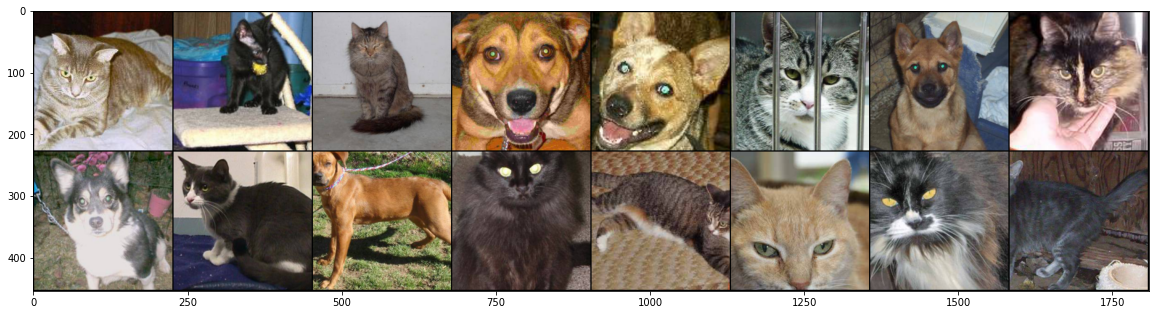

In [13]:
# 이미지를 봐보자.

def imshow(inp, title=None):
  """Imshow for Tensor."""
  inp = inp.numpy().transpose((1,2,0)) # input 값을 numpy 배열로 바꾸고, transpose로 차원을 변경해준다.
  plt.figure(figsize=(20,150))
  plt.imshow(inp)

inputs, classes = next(iter(train_loader))  

# Make a grid from batch
out = torchvision.utils.make_grid(inputs, scale_each=True)

imshow(out)

이때 transpose((1,2,0))인 것은 기존 (0,1,2)의 차원을 (1,2,0)의 차원으로 바꾼다는 소리다.

그냥 np.transpose(matrix) 이런식으로 넣으면 matrix.shape이 만약 (7,5,2) 이면 바뀐 차원은 (2,5,7)이다.

이거에 대한 설명은 https://superelement.tistory.com/18 여기 나와있다.

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

# 랜덤 시드 고정
torch.manual_seed(42)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device =='cuda':
  torch.cuda.manual_seed_all(42)

cuda


In [15]:
learning_rate = 0.001
epochs = 20

##6.3 모델 1

In [16]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    '''
    layer 1
    Image shape = (batch_size, 224, 224, 3)
    Conv layer = (batch_size, 224, 224, 6)
    Pool layer = (batch_size, 112, 112, 6)
    '''
    self.layer1 = nn.Sequential(
        nn.Conv2d(3, 6, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    
    '''
    layer 2
    Image shape = (batch_size, 112, 112, 6)
    Conv layer = (batch_size, 112, 112, 9)
    Pool layer = (batch_size, 56, 56, 9)
    '''
    self.layer2 = nn.Sequential(
        nn.Conv2d(6, 9, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    '''
    layer 3
    Image shape = (batch_size, 56, 56, 9)
    fully connected layer = (56 * 56 * 9, 2)    
    '''
    self.fc = nn.Linear(56 * 56 * 9, 2, bias=True)

    # 전결합층 한정으로 가중치 초기화
    nn.init.xavier_uniform_(self.fc.weight)

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.view(out.size(0), -1) # 전결합층을 위해서 Flatten
    out = self.fc(out)
    return out

In [17]:
model = CNN().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [18]:
# 이 모델에서 파라미터는 총 몇개일까?
# 가중치 매개변수의 총 수 : 커널의 높이 X 커널의 너비 X 입력 데이터의 채널 X 합성곱 연산에 사용하는 커널의 수
print((3*3*3*6)+6+(3*3*6*9)+9+(56*56*9*2)+2)

# 모델의 state_dict 출력
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\n", model.state_dict()[param_tensor].size())

57113
Model's state_dict:
layer1.0.weight 
 torch.Size([6, 3, 3, 3])
layer1.0.bias 
 torch.Size([6])
layer2.0.weight 
 torch.Size([9, 6, 3, 3])
layer2.0.bias 
 torch.Size([9])
fc.weight 
 torch.Size([2, 28224])
fc.bias 
 torch.Size([2])


In [19]:
plot_list = {'train':[], 'val':[], 'accuracy':[]}

for epoch in range(epochs):
  model.train()
  train_losses = []  
  for batch_number, (img, label) in enumerate(train_loader):
    img = img.to(device)
    label = label.to(device)

    optimizer.zero_grad()
    output = model(img)
    train_loss = criterion(output, label)
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss.item())
    #print(batch_number)

  with torch.no_grad():
    model.eval()
    val_losses = []
    for batch_number, (img, label) in enumerate(val_loader):
      img = img.to(device)
      label = label.to(device)

      output = model(img)
      val_loss = criterion(output, label)
      val_losses.append(val_loss.item())
  
      ps = torch.exp(output)
      top_ps, top_class = ps.topk(1, dim=1)
    equality = top_class == label.view(*top_class.shape)
    accuracy = torch.mean(equality.type(torch.FloatTensor)).item()
    
  plot_list['train'].append(sum(train_losses)/len(train_losses))
  plot_list['val'].append(sum(val_losses)/len(val_losses))
  plot_list['accuracy'].append(accuracy)

  print(f'{epoch+1} epoch train loss = {sum(train_losses)/len(train_losses)}')
  print(f'{epoch+1} epoch val loss = {sum(val_losses)/len(val_losses)}')
  print(f'{epoch+1} epoch accuracy = {accuracy}')
  print('-'*50)

1 epoch train loss = 0.7716156065464019
1 epoch val loss = 0.7118711471557617
1 epoch accuracy = 0.46341463923454285
--------------------------------------------------
2 epoch train loss = 0.6915771842002869
2 epoch val loss = 0.6826208233833313
2 epoch accuracy = 0.6097561120986938
--------------------------------------------------
3 epoch train loss = 0.6813297033309936
3 epoch val loss = 0.7224195003509521
3 epoch accuracy = 0.4390243887901306
--------------------------------------------------
4 epoch train loss = 0.652150321006775
4 epoch val loss = 0.6797364950180054
4 epoch accuracy = 0.5609756112098694
--------------------------------------------------
5 epoch train loss = 0.6367749571800232
5 epoch val loss = 0.6858833432197571
5 epoch accuracy = 0.5853658318519592
--------------------------------------------------
6 epoch train loss = 0.628005176782608
6 epoch val loss = 0.6934688091278076
6 epoch accuracy = 0.5853658318519592
--------------------------------------------------

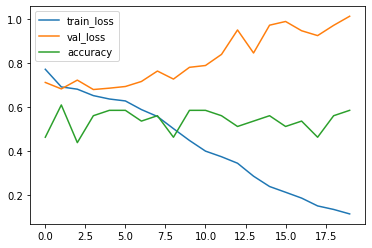

In [20]:
plt.plot(plot_list['train'], label='train_loss')
plt.plot(plot_list['val'], label='val_loss')
plt.plot(plot_list['accuracy'], label='accuracy')
plt.legend()
plt.show()

##6.4 모델 2 (Resnet)

In [21]:
from torchvision import models

In [22]:
resnet = models.resnet18(pretrained = True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [23]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [24]:
for params in resnet.parameters():
  params.requires_grad = False

In [25]:
from collections import OrderedDict

classifier = nn.Sequential(OrderedDict([
                                ('fc1', nn.Linear(512,256)),
                                ('relu', nn.ReLU()),
                                ('fc2', nn.Linear(256,2)),
                                ('Output',nn.LogSoftmax(dim=1))
]))

resnet.fc = classifier

In [26]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [27]:
model = resnet.to(device)
criterion = nn.NLLLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [28]:
plot_list = {'train':[], 'val':[], 'accuracy':[]}

for epoch in range(epochs):
  model.train()
  train_losses = []  
  for batch_number, (img, label) in enumerate(train_loader):
    img = img.to(device)
    label = label.to(device)

    optimizer.zero_grad()
    output = model(img)
    train_loss = criterion(output, label)
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss.item())
    #print(batch_number)

  with torch.no_grad():
    model.eval()
    val_losses = []
    for batch_number, (img, label) in enumerate(val_loader):
      img = img.to(device)
      label = label.to(device)

      output = model(img)
      val_loss = criterion(output, label)
      val_losses.append(val_loss.item())
  
      ps = torch.exp(output)
      top_ps, top_class = ps.topk(1, dim=1)
    equality = top_class == label.view(*top_class.shape)
    accuracy = torch.mean(equality.type(torch.FloatTensor)).item()
    
  plot_list['train'].append(sum(train_losses)/len(train_losses))
  plot_list['val'].append(sum(val_losses)/len(val_losses))
  plot_list['accuracy'].append(accuracy)

  print(f'{epoch+1} epoch train loss = {sum(train_losses)/len(train_losses)}')
  print(f'{epoch+1} epoch val loss = {sum(val_losses)/len(val_losses)}')
  print(f'{epoch+1} epoch accuracy = {accuracy}')
  print('-'*50)

1 epoch train loss = 0.47604242116212847
1 epoch val loss = 0.19666920602321625
1 epoch accuracy = 1.0
--------------------------------------------------
2 epoch train loss = 0.14789094179868698
2 epoch val loss = 0.1299724131822586
2 epoch accuracy = 0.9756097793579102
--------------------------------------------------
3 epoch train loss = 0.23202211000025272
3 epoch val loss = 0.040208835154771805
3 epoch accuracy = 1.0
--------------------------------------------------
4 epoch train loss = 0.19240917125716805
4 epoch val loss = 0.0528605617582798
4 epoch accuracy = 0.9756097793579102
--------------------------------------------------
5 epoch train loss = 0.13752719713374972
5 epoch val loss = 0.06781753897666931
5 epoch accuracy = 0.9756097793579102
--------------------------------------------------
6 epoch train loss = 0.14349658079445363
6 epoch val loss = 0.08971460908651352
6 epoch accuracy = 0.9512194991111755
--------------------------------------------------
7 epoch train los

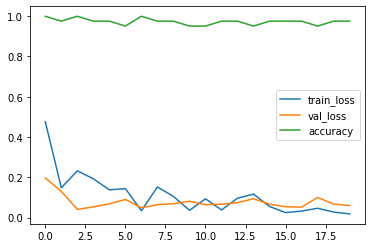

In [29]:
plt.plot(plot_list['train'], label='train_loss')
plt.plot(plot_list['val'], label='val_loss')
plt.plot(plot_list['accuracy'], label='accuracy')
plt.legend()
plt.show()

오늘의 깨달음

1. MNIST 데이터를 벗어나면 이미지의 픽셀 수부터가 달라지고 엄청난 연산이 필요하다. MNIST의 픽셀은 28 X 28, 오늘의 데이터는 244 X 244

2. 솔직히 다들 개, 고양이 말하길래 8000 이미지 정도면 화장실 다녀오면 되는 줄 알았다 ㅎ..

2. transfer learning 할 때 fine tuning 하는게 글로만 보다가 실제 겪어 본 경험 + 가져다 쓰기만 하는 것도 모델이 깊으면 뚫고 가는게 쉽지 않다는 것

인준이형 예제 : https://github.com/cij1012/pytorch/blob/master/CNN_mydata.ipynb

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [31]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else 'cpu')
print('학습',device)

학습 cuda


In [32]:
torch.manual_seed(1012)
if device=='cuda':
  torch.cuda.manual_seed_all(1012)

In [33]:
kmnist_train = dsets.KMNIST(root='KMNIST_data/',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)
kmnist_test = dsets.KMNIST(root='KMNIST_data/',
                          train=False,
                          transform=transforms.ToTensor(),
                          download=True)

Extracting KMNIST_data/KMNIST/raw/train-images-idx3-ubyte.gz to KMNIST_data/KMNIST/raw


Extracting KMNIST_data/KMNIST/raw/train-labels-idx1-ubyte.gz to KMNIST_data/KMNIST/raw




Extracting KMNIST_data/KMNIST/raw/t10k-images-idx3-ubyte.gz to KMNIST_data/KMNIST/raw


Extracting KMNIST_data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to KMNIST_data/KMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [34]:
learning_rate = 0.001
epochs = 10
batch_size = 100

In [35]:
train_loader = torch.utils.data.DataLoader(dataset=kmnist_train,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           drop_last=True)
test_loader = torch.utils.data.DataLoader(dataset=kmnist_test,
                                          batch_size=len(kmnist_test))

In [36]:
class CNN(torch.nn.Module):

  def __init__(self):
    super(CNN, self).__init__()
    self.layer1 = torch.nn.Sequential(
        torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=2, stride=2))
  
    self.layer2 = torch.nn.Sequential(
      torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
      torch.nn.ReLU(),
      torch.nn.MaxPool2d(kernel_size=2,stride=2))

    self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True)

    torch.nn.init.xavier_normal_(self.fc.weight)

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.view(out.size(0), -1)
    out = self.fc(out)
    return out

In [37]:
model = CNN().to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [38]:
total_batch = len(train_loader)
print('배치 수 : {}'.format(total_batch))

배치 수 : 600


In [39]:
plot_list = {'train' : [], 'val' :[], 'accuracy' : []}

for epoch in range(epochs):
  model.train()
  train_losses = []
  for X, Y in train_loader:
    X = X.to(device)
    Y = Y.to(device)

    optimizer.zero_grad()
    hypothesis = model(X)
    train_loss = criterion(hypothesis, Y)
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss.detach())
  with torch.no_grad():
    model.eval()
    val_losses = []
    for i,data in enumerate(test_loader):
      inputs, targets = data[0].to(device), data[1].to(device)

      outputs = model(inputs)
      val_loss = criterion(outputs, targets)
      val_losses.append(val_loss.detach())

      prob,label = torch.exp(outputs).topk(1,dim=1)

    correct = label.view(-1)==targets
    val_accuracy = correct.float().mean()
  print(f"{epoch+1} epoch train loss = {sum(train_losses)/len(train_losses)}")
  print(f"{epoch+1} epoch val loss = {sum(val_losses)/len(val_losses)}")
  print(f"{epoch+1} epoch accuracy = {val_accuracy}")
  print('--------------------------------------------------')
  plot_list['train'].append(sum(train_losses)/len(train_losses))
  plot_list['val'].append(sum(val_losses)/len(val_losses))
  plot_list['accuracy'].append(val_accuracy)


1 epoch train loss = 0.3989066779613495
1 epoch val loss = 0.44144654273986816
1 epoch accuracy = 0.8721999526023865
--------------------------------------------------
2 epoch train loss = 0.14758536219596863
2 epoch val loss = 0.33710840344429016
2 epoch accuracy = 0.902999997138977
--------------------------------------------------
3 epoch train loss = 0.10422925651073456
3 epoch val loss = 0.31105566024780273
3 epoch accuracy = 0.9124999642372131
--------------------------------------------------
4 epoch train loss = 0.08056890964508057
4 epoch val loss = 0.26641175150871277
4 epoch accuracy = 0.9239999651908875
--------------------------------------------------
5 epoch train loss = 0.0639108419418335
5 epoch val loss = 0.2816820442676544
5 epoch accuracy = 0.9240999817848206
--------------------------------------------------
6 epoch train loss = 0.05043525621294975
6 epoch val loss = 0.2479003667831421
6 epoch accuracy = 0.936199963092804
------------------------------------------

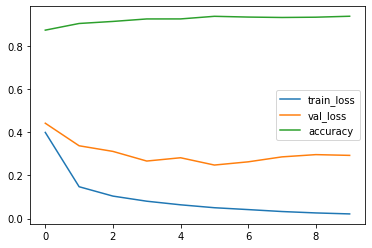

In [40]:
plt.plot(plot_list['train'], label='train_loss')
plt.plot(plot_list['val'], label='val_loss')
plt.plot(plot_list['accuracy'], label='accuracy')
plt.legend()
plt.show()

형근이형 예제 : https://github.com/leehyunggeunkeun/pytorch-study/blob/master/pytorch_0518_%ED%95%A9%EC%84%B1%EA%B3%B1%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.datasets as dset
import torchvision.transforms as transform

from torch.utils.data import DataLoader
import torch.nn.init

In [42]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [43]:
device

'cuda'

In [44]:
#이미지를 텐서로 변환해주는건 필수...

trans=transform.Compose(
[transform.ToTensor(),
transform.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])

])


In [45]:
cifar10_train=dset.CIFAR10(root='CIFAR10/',train=True,download=True,transform=trans)
cifar10_test=dset.CIFAR10(root='CIFAR10/',train=False,download=True,transform=trans)


Extracting CIFAR10/cifar-10-python.tar.gz to CIFAR10/
Files already downloaded and verified


In [46]:
import os
os.listdir('CIFAR10/cifar-10-batches-py')


['data_batch_1',
 'data_batch_4',
 'batches.meta',
 'data_batch_2',
 'data_batch_3',
 'readme.html',
 'data_batch_5',
 'test_batch']

In [47]:
train_loader=DataLoader(dataset=cifar10_train,batch_size=64,shuffle=True,drop_last=True)
test_loader=DataLoader(dataset=cifar10_test,batch_size=64,shuffle=False)

#train 50000, test10000


In [48]:
images,labels = next(iter(train_loader))


In [49]:
images.shape, labels.shape  #이미지의 shape 한번 확인  배치사이즈*채널*height*width


(torch.Size([64, 3, 32, 32]), torch.Size([64]))

In [50]:
images[0].shape


torch.Size([3, 32, 32])

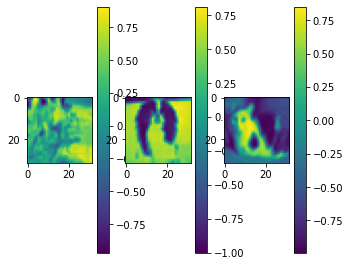

In [51]:
import matplotlib.pyplot as plt


plt.figure(figsize=(5,10))

plt.subplot(131)
plt.imshow(images[10][0,:,:])
plt.colorbar()

plt.subplot(132)
plt.imshow(images[20][0,:,:])
plt.colorbar()


plt.subplot(133)
plt.imshow(images[30][0,:,:])
plt.colorbar()


plt.show()


In [52]:
class cifar10(nn.Module):

    def __init__(self):
        super().__init__()
        
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer4 = torch.nn.Sequential(
            torch.nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.fc = torch.nn.Linear(2 * 2 *256, 10, bias=True)
        torch.nn.init.kaiming_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.view(out.size(0), -1)  
        out = self.fc(out)
        return out


In [53]:
model=cifar10().to(device)
criterion=nn.CrossEntropyLoss().to(device)
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [54]:
total_batch = len(train_loader)
print('총 배치의 수 : {}'.format(total_batch))


총 배치의 수 : 781


In [55]:
plot_list = {'train' : [], 'val' :[], 'accuracy' : []}

for epoch in range(5):
  model.train()
  train_losses = []
  for images, labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    hypothesis = model(images)
    train_loss = criterion(hypothesis, labels)
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss.detach())
  with torch.no_grad():
    model.eval()
    val_losses = []
    for i,data in enumerate(test_loader):
      inputs, targets = data[0].to(device), data[1].to(device)

      outputs = model(inputs)
      val_loss = criterion(outputs, targets)
      val_losses.append(val_loss.detach())

      prob,label = torch.exp(outputs).topk(1,dim=1)

    correct = label.view(-1)==targets
    val_accuracy = correct.float().mean()
  print(f"{epoch+1} epoch train loss = {sum(train_losses)/len(train_losses)}")
  print(f"{epoch+1} epoch val loss = {sum(val_losses)/len(val_losses)}")
  print(f"{epoch+1} epoch accuracy = {val_accuracy}")
  print('--------------------------------------------------')
  plot_list['train'].append(sum(train_losses)/len(train_losses))
  plot_list['val'].append(sum(val_losses)/len(val_losses))
  plot_list['accuracy'].append(val_accuracy)

1 epoch train loss = 1.3543603420257568
1 epoch val loss = 1.0483057498931885
1 epoch accuracy = 0.5625
--------------------------------------------------
2 epoch train loss = 0.8973978757858276
2 epoch val loss = 0.8255396485328674
2 epoch accuracy = 0.5625
--------------------------------------------------
3 epoch train loss = 0.7058379650115967
3 epoch val loss = 0.7876462340354919
3 epoch accuracy = 0.6875
--------------------------------------------------
4 epoch train loss = 0.5710803270339966
4 epoch val loss = 0.7544285655021667
4 epoch accuracy = 0.625
--------------------------------------------------
5 epoch train loss = 0.45224571228027344
5 epoch val loss = 0.7377216219902039
5 epoch accuracy = 0.75
--------------------------------------------------


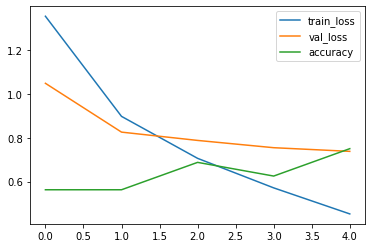

In [56]:
plt.plot(plot_list['train'], label='train_loss')
plt.plot(plot_list['val'], label='val_loss')
plt.plot(plot_list['accuracy'], label='accuracy')
plt.legend()
plt.show()